In [2]:
import random
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
df = pd.read_parquet('data/residential_sales.parquet')
df.shape

(1017857, 14)

In [4]:
df.head()

,transaction_id,instance_date,area_name_en,CNAME_E,procedure_name_en,property_type_en,rooms_en,has_parking,nearest_landmark_en,nearest_metro_en,nearest_mall_en,procedure_area,actual_worth,meter_sale_price
0,1-11-2025-36691,2025-09-04,AL KARAMA,AL KARAMA,Sell,Building,None,0,Burj Khalifa,ADCB Metro Station,Dubai Mall,211.37,7000000.0,33117.28
1,1-11-2023-24638,2023-08-18,AL KARAMA,AL KARAMA,Sell,Building,None,0,Burj Khalifa,ADCB Metro Station,Dubai Mall,211.35,5000000.0,23657.44
2,1-11-2023-19347,2023-06-22,AL SATWA,AL SATWA,Sell,Land,None,0,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,195.10,4000000.0,20502.31
3,1-11-2013-2580,2013-01-28,NAD AL HAMAR,NADD AL HAMAR,Sell,Land,None,0,Dubai International Airport,Rashidiya Metro Station,City Centre Mirdif,1428.38,2921250.0,2045.15
4,1-11-2016-4132,2016-04-11,HOR AL ANZ EAST,HOR AL ANZ EAST,Sell,Villa,None,0,Dubai International Airport,Abu Hail Metro Station,None,455.22,3900000.0,8567.29


In [19]:
mask = (df['area_name_en'] == 'AL YELAYISS 1')
df[mask]

,transaction_id,instance_date,area_name_en,CNAME_E,procedure_name_en,property_type_en,rooms_en,has_parking,nearest_landmark_en,nearest_metro_en,nearest_mall_en,procedure_area,actual_worth,meter_sale_price
5782,1-102-2014-16245,2014-12-23,AL YELAYISS 1,AL WASL,Sell - Pre registration,Villa,3 B/R,0,Dubai Cycling Course,None,None,301.00,1800888.0,5983.02
5783,1-102-2014-16365,2014-12-24,AL YELAYISS 1,AL WASL,Sell - Pre registration,Villa,3 B/R,0,Dubai Cycling Course,None,None,362.00,2137888.0,5905.77
5795,1-102-2013-14350,2013-12-23,AL YELAYISS 1,AL WASL,Sell - Pre registration,Villa,3 B/R,0,Dubai Cycling Course,None,None,278.39,1491888.0,5358.99
5899,1-11-2017-1909,2017-02-07,AL YELAYISS 1,AL WASL,Sell,Villa,3 B/R,0,Dubai Cycling Course,None,None,243.00,2050000.0,8436.21
5900,1-102-2013-14272,2013-12-23,AL YELAYISS 1,AL WASL,Sell - Pre registration,Villa,4 B/R,0,Dubai Cycling Course,None,None,295.92,1648888.0,5572.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,1-11-2023-9337,2023-03-29,AL YELAYISS 1,AL WASL,Sell,Villa,3 B/R,0,Dubai Cycling Course,None,None,540.18,2550000.0,4720.65
1016694,1-102-2021-555,2021-01-13,AL YELAYISS 1,AL WASL,Sell - Pre registration,Villa,4 B/R,0,Dubai Cycling Course,None,None,451.07,2100000.0,4655.60
1017133,1-11-2024-44608,2024-11-19,AL YELAYISS 1,AL WASL,Sell,Villa,3 B/R,0,Dubai Cycling Course,None,None,243.03,3200000.0,13167.10
1017152,1-102-2014-11830,2014-10-07,AL YELAYISS 1,AL WASL,Sell - Pre registration,Villa,3 B/R,0,Dubai Cycling Course,None,None,221.00,1580888.0,7153.34


In [18]:
# show how many different nearest_metro_en per area_name_en
df.groupby('area_name_en')['nearest_metro_en'].nunique().sort_values(ascending=False).reset_index(drop=False)


,area_name_en,nearest_metro_en
0,PALM JUMEIRAH,7
1,MARSA DUBAI,7
2,JUMEIRAH FIRST,5
3,AL THANYAH FIFTH,4
4,AL MURQABAT,4
...,...,...
149,AL YELAYISS 1,0
150,AL ATHBAH,0
151,MADINAT HIND 3,0
152,SAIH ALDAHAL,0


In [6]:
df.groupby("property_type_en")["meter_sale_price"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type_en,,,,,,,,
Building,3770.0,10362.414496,12390.021107,1.00,2640.8600,6485.725,14471.265,326021.75
Land,26236.0,7395.427260,7659.408372,5.00,2421.8700,5119.120,10225.720,149938.59
Unit,832190.0,17218.142477,130953.428099,0.01,9600.2125,14166.580,20236.290,81250000.00
Villa,155661.0,10080.838214,7467.218356,0.00,6221.6700,8930.300,12889.630,1675000.00


In [54]:
lower = df["meter_sale_price"].quantile(0.005)
upper = df["meter_sale_price"].quantile(0.995)

mask_upper = df["meter_sale_price"] < upper
mask_lower = df["meter_sale_price"] > lower

df = df[mask_upper & mask_lower
        ]
df.shape

(1007662, 14)

In [55]:
df.groupby("property_type_en")["meter_sale_price"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type_en,,,,,,,,
Building,3225.0,11317.842136,9804.759314,1345.49,3558.03,8146.11,15613.910,50730.52
Land,23333.0,7920.933423,6520.120644,1345.46,3013.89,5861.02,11066.670,52044.87
Unit,826781.0,15668.082958,8049.843630,1345.72,9585.16,14118.34,20119.940,52185.04
Villa,154323.0,10047.945902,5515.909284,1345.49,6277.26,8968.49,12910.855,52122.59


In [56]:
mean_by_group = df.groupby("property_type_en")["meter_sale_price"].mean()
std_by_group = df.groupby("property_type_en")["meter_sale_price"].std()
cnt_by_group = df.groupby("property_type_en")["meter_sale_price"].count()

pd.DataFrame([std_by_group/mean_by_group, cnt_by_group]).T

,meter_sale_price,meter_sale_price
property_type_en,,
Building,0.866310,3225.0
Land,0.823151,23333.0
Unit,0.513773,826781.0
Villa,0.548959,154323.0


property_type_en
Unit     Axes(0.125,0.11;0.775x0.77)
Villa    Axes(0.125,0.11;0.775x0.77)
Name: meter_sale_price, dtype: object

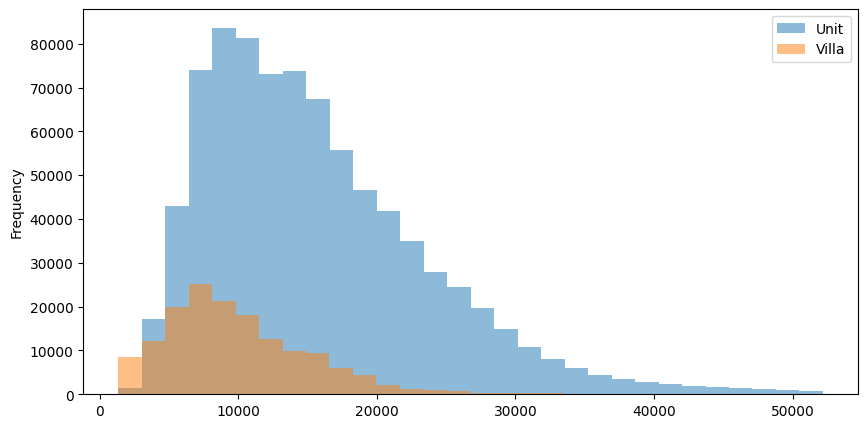

In [57]:
mask = df["property_type_en"].isin(
    ["Unit", "Villa"]
)

(
    df[mask]
    .groupby("property_type_en")["meter_sale_price"]
    .plot.
    hist(
        bins=30,
        alpha=0.5,
        legend=True,
        figsize=(10, 5)
    )
)

property_type_en
Building    Axes(0.125,0.11;0.775x0.77)
Land        Axes(0.125,0.11;0.775x0.77)
Name: meter_sale_price, dtype: object

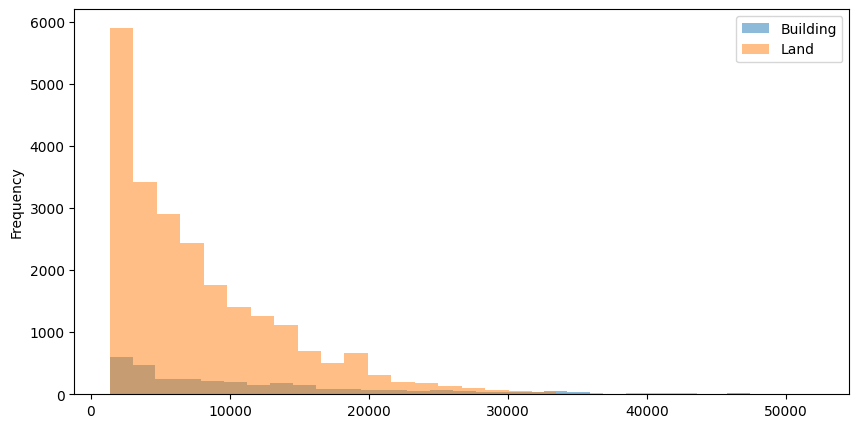

In [58]:
mask = df["property_type_en"].isin(
    ["Land","Building"]
)

(
    df[mask]
    .groupby("property_type_en")["meter_sale_price"]
    .plot.
    hist(
        bins=30,
        alpha=0.5,
        legend=True,
        figsize=(10, 5)
    )
)

In [59]:
df_unit = df[df["property_type_en"] == "Unit"]

df_unit.shape

(826781, 14)

rooms_en
1 B/R          Axes(0.125,0.11;0.775x0.77)
2 B/R          Axes(0.125,0.11;0.775x0.77)
3 B/R          Axes(0.125,0.11;0.775x0.77)
4 B/R          Axes(0.125,0.11;0.775x0.77)
5 B/R          Axes(0.125,0.11;0.775x0.77)
6 B/R          Axes(0.125,0.11;0.775x0.77)
7 B/R          Axes(0.125,0.11;0.775x0.77)
8 B/R          Axes(0.125,0.11;0.775x0.77)
9 B/R          Axes(0.125,0.11;0.775x0.77)
Office         Axes(0.125,0.11;0.775x0.77)
PENTHOUSE      Axes(0.125,0.11;0.775x0.77)
Shop           Axes(0.125,0.11;0.775x0.77)
Single Room    Axes(0.125,0.11;0.775x0.77)
Studio         Axes(0.125,0.11;0.775x0.77)
Name: meter_sale_price, dtype: object

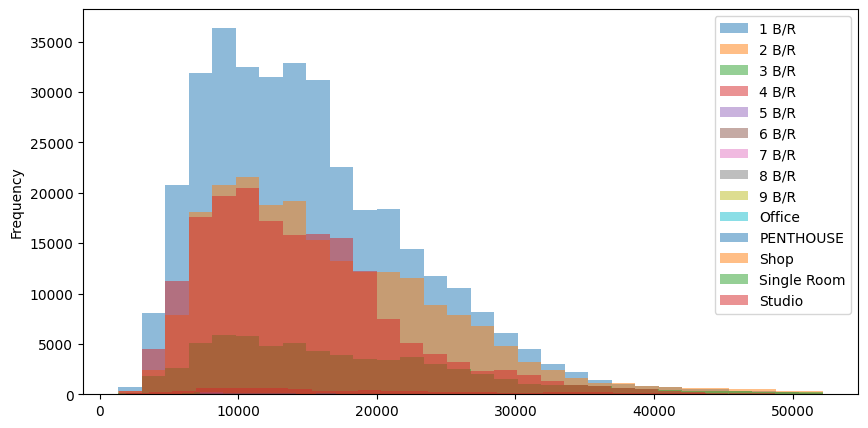

In [60]:
(
    df_unit
    .groupby("rooms_en")["meter_sale_price"]
    .plot.
    hist(
        bins=30,
        alpha=0.5,
        legend=True,
        figsize=(10, 5)
    )
)

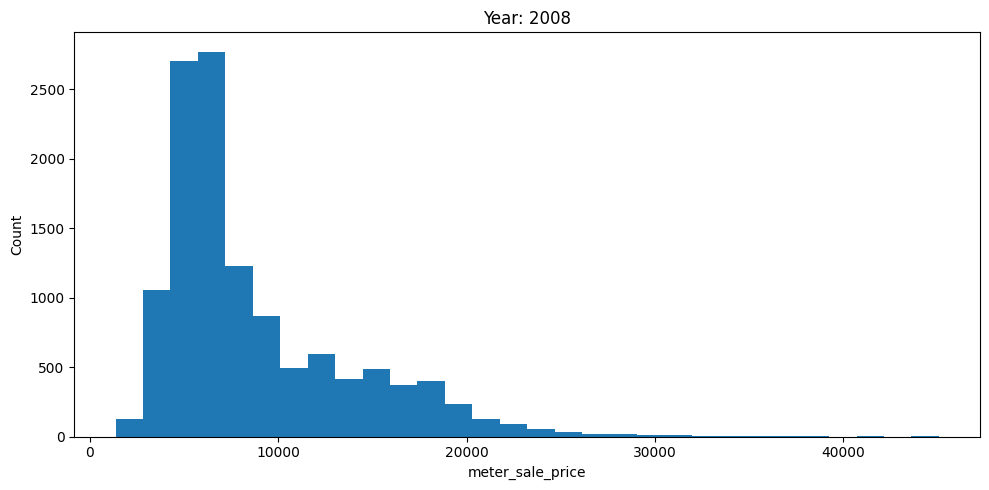

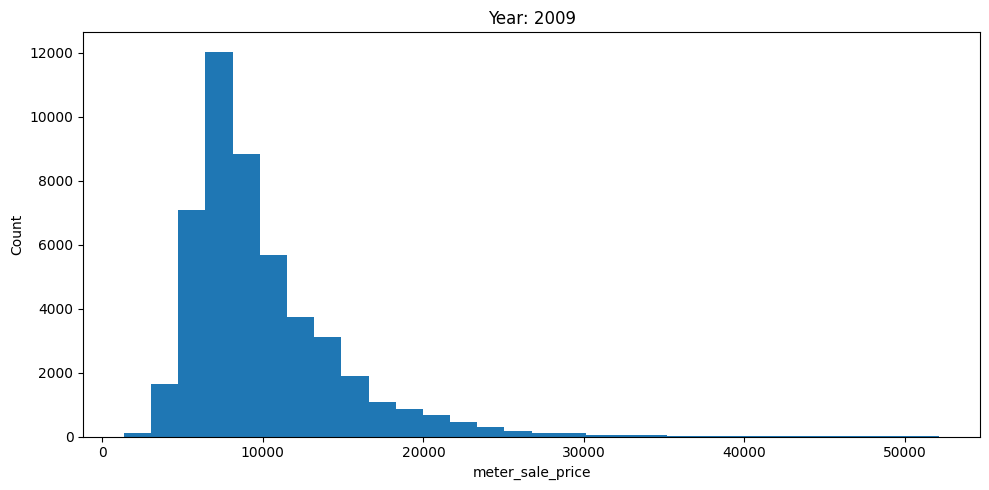

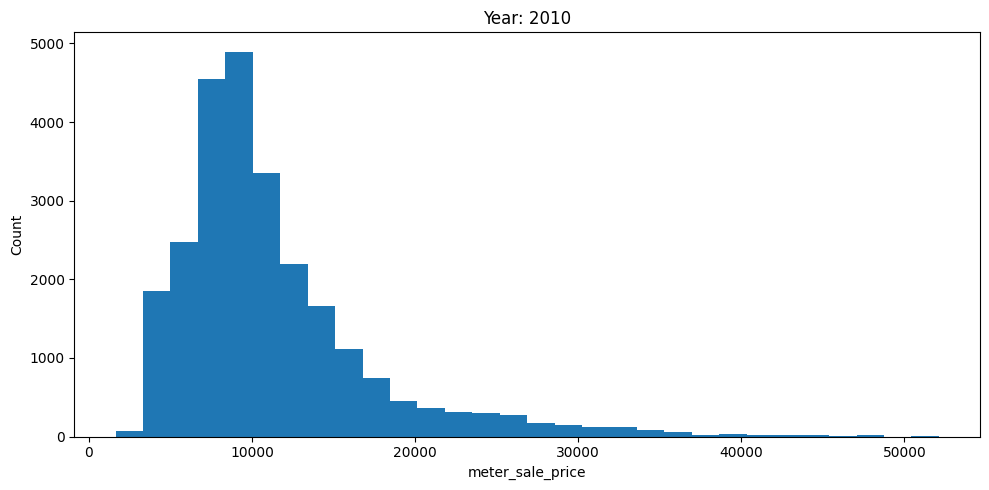

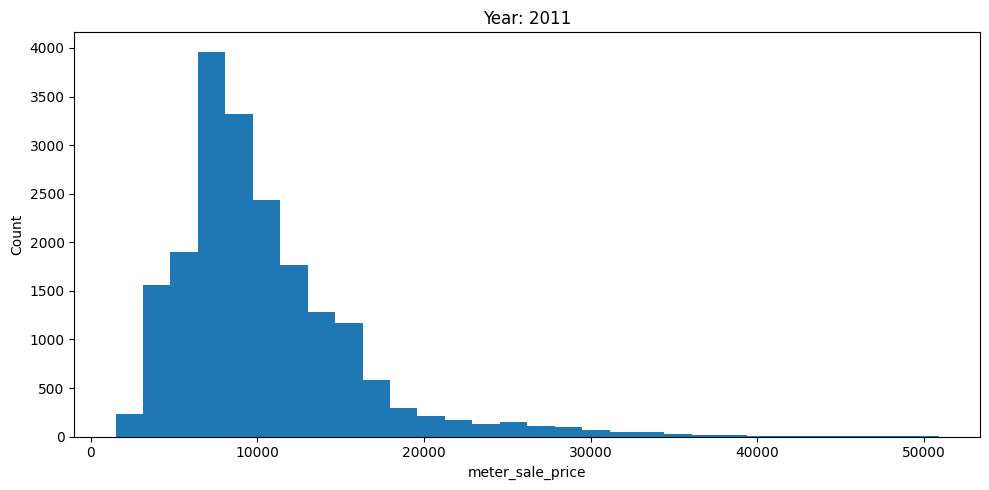

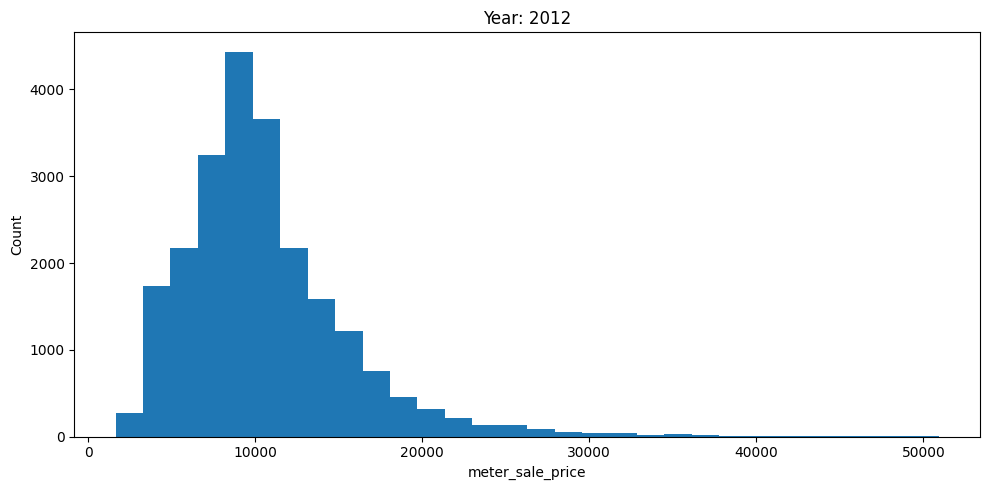

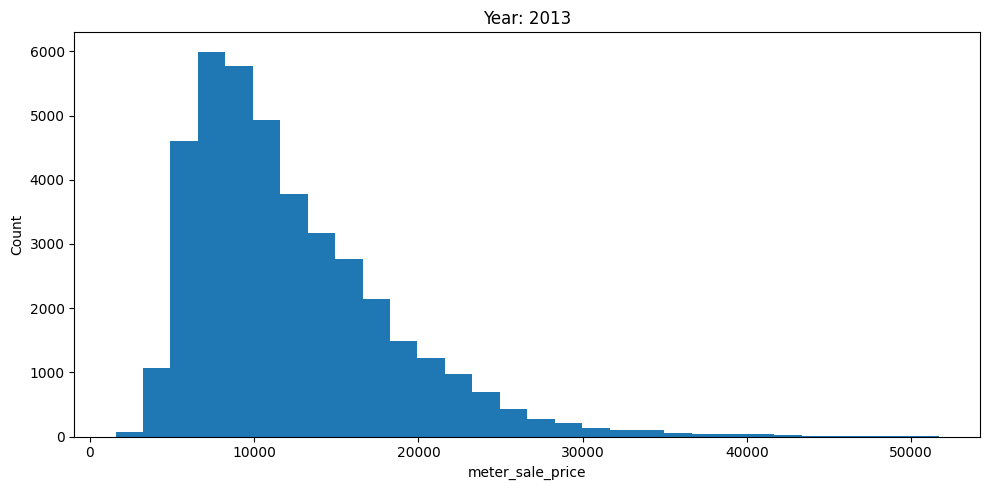

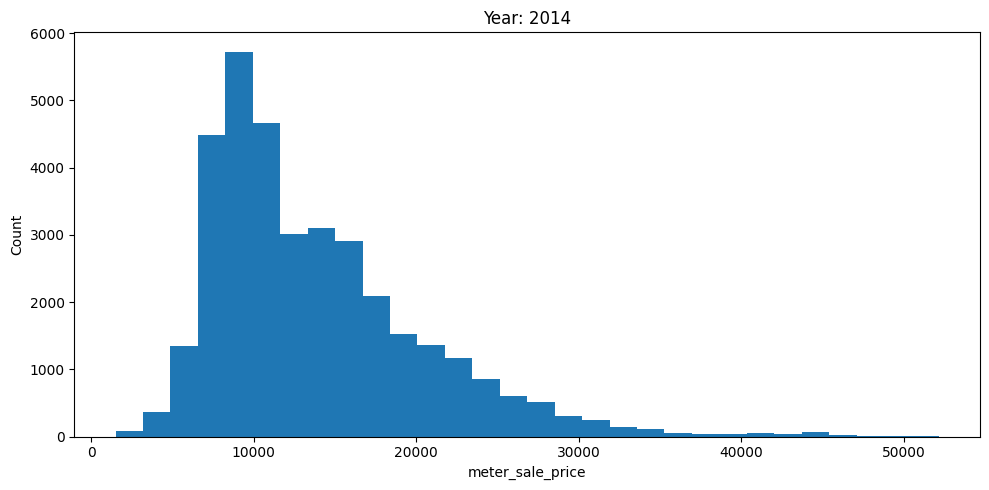

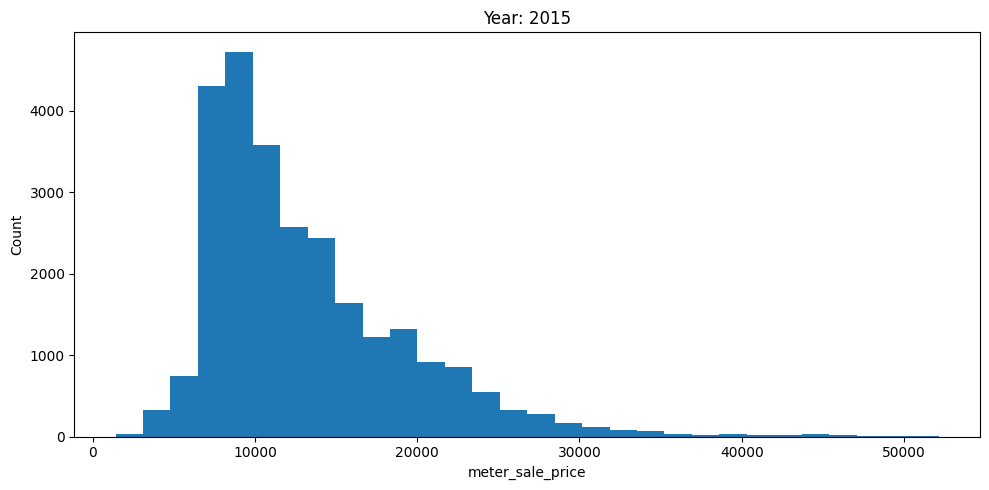

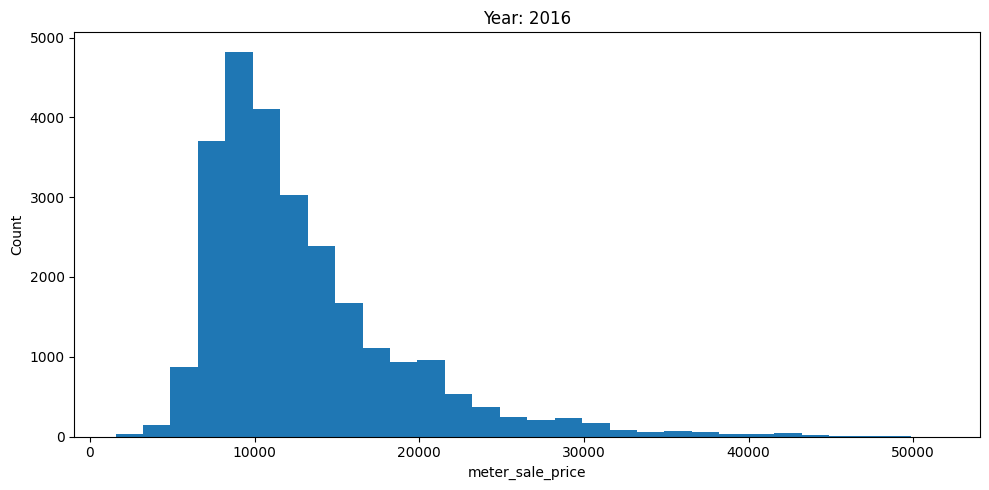

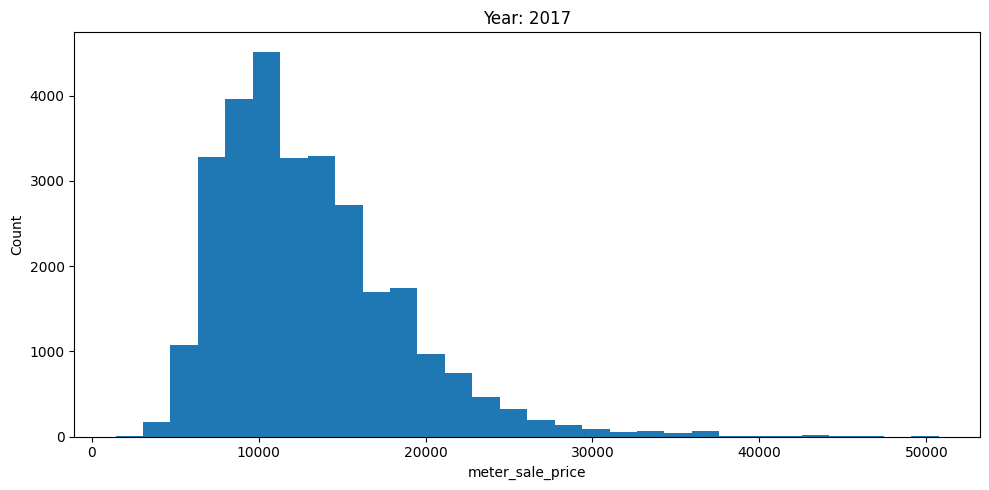

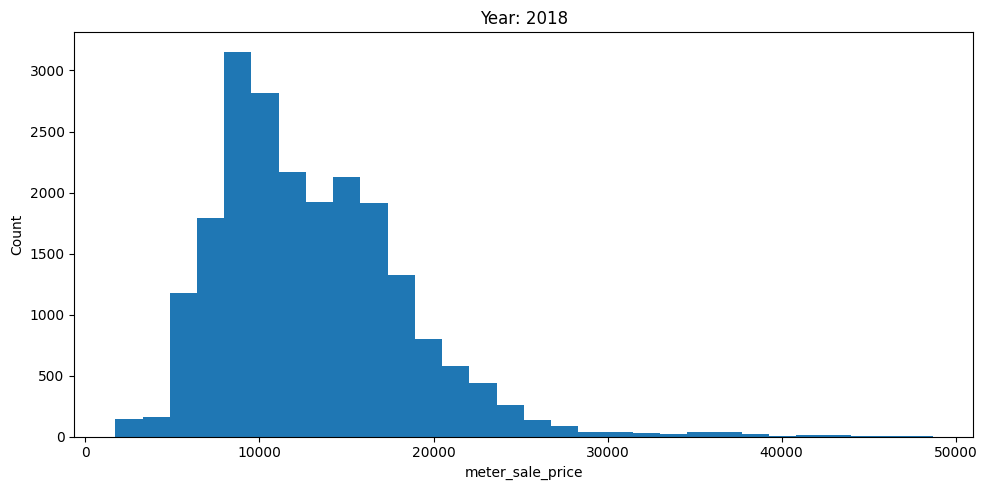

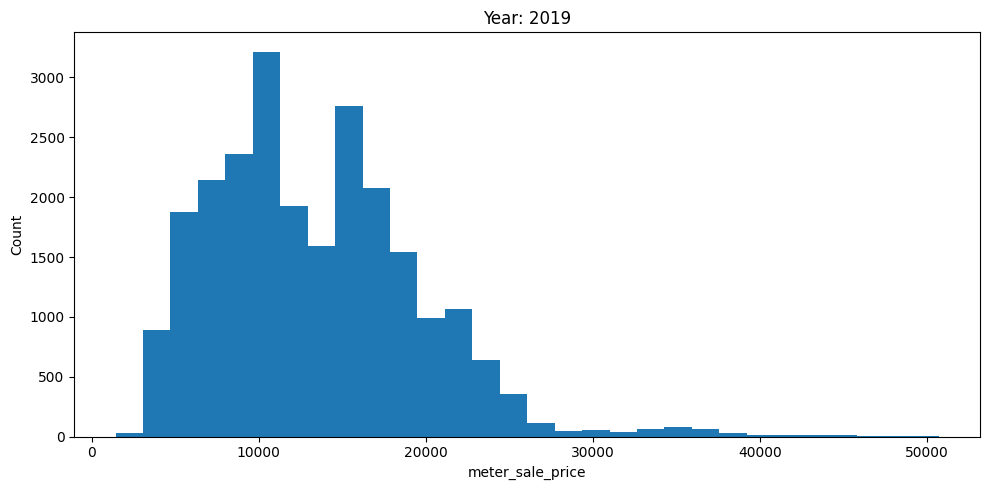

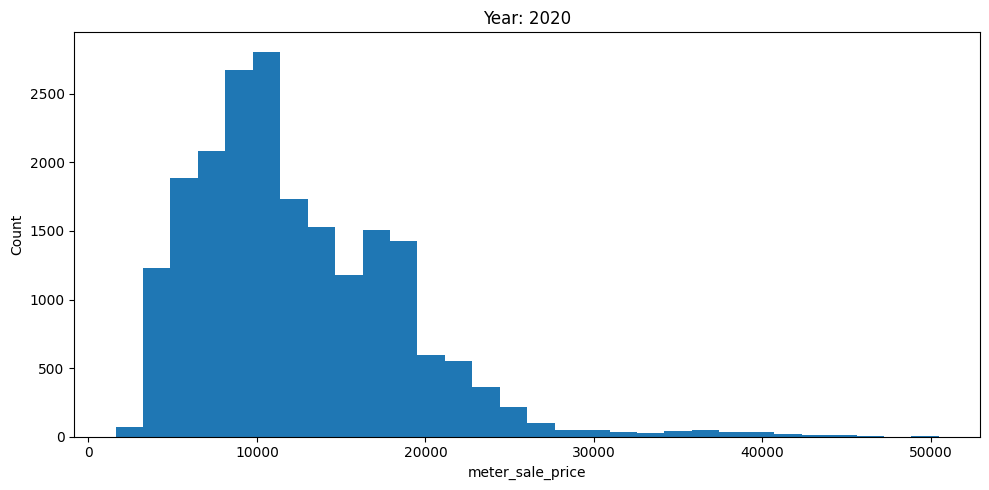

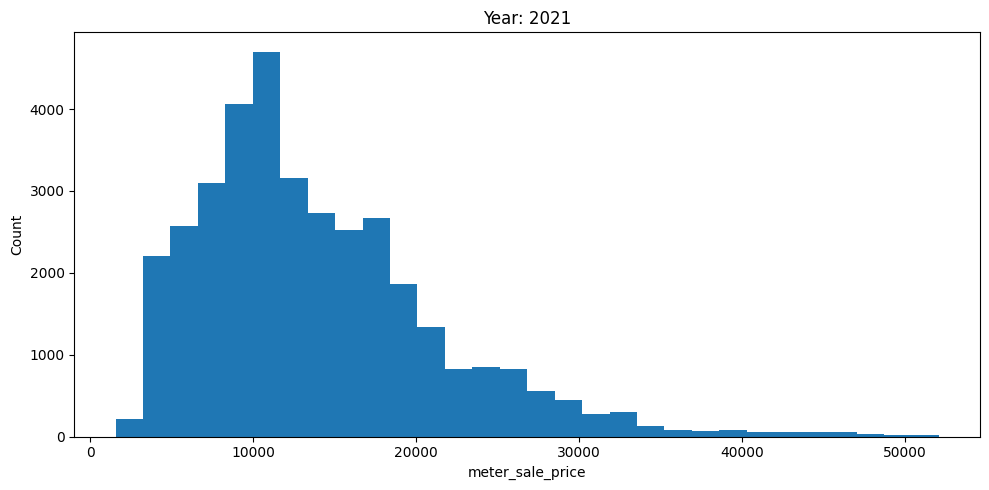

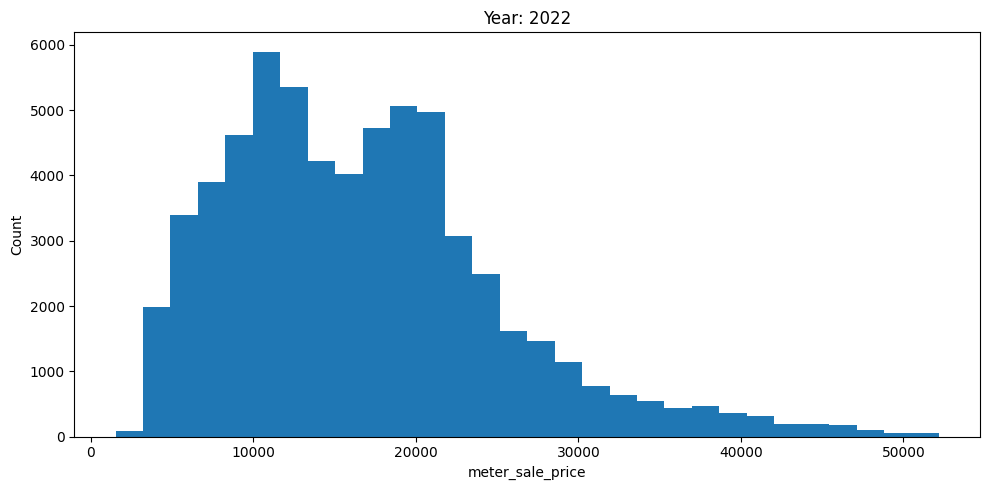

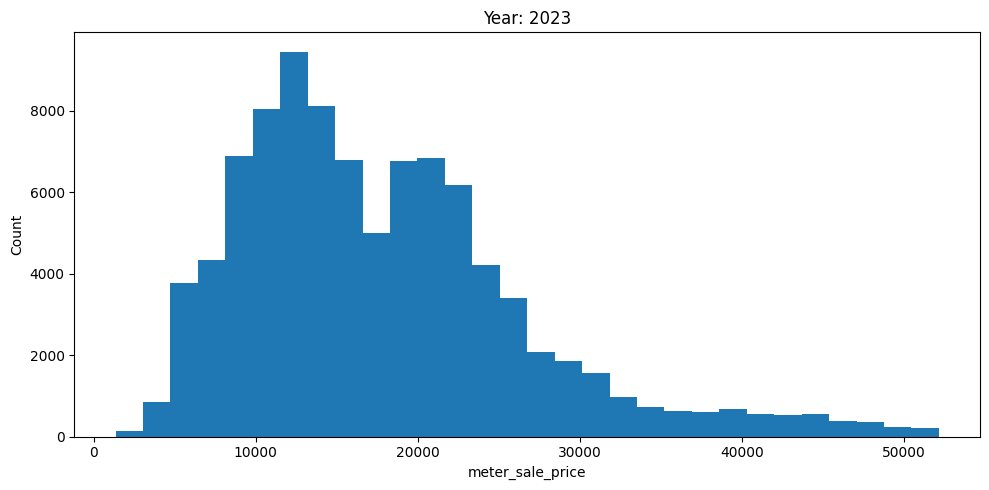

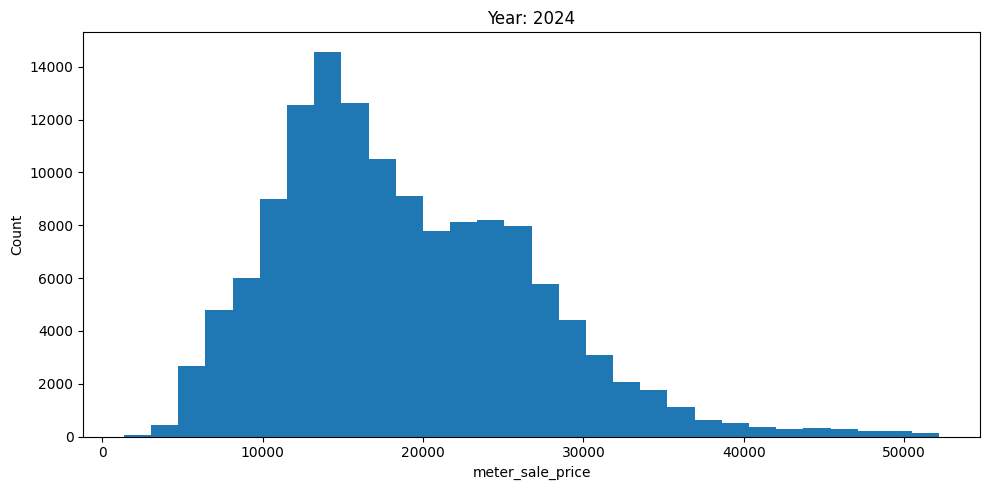

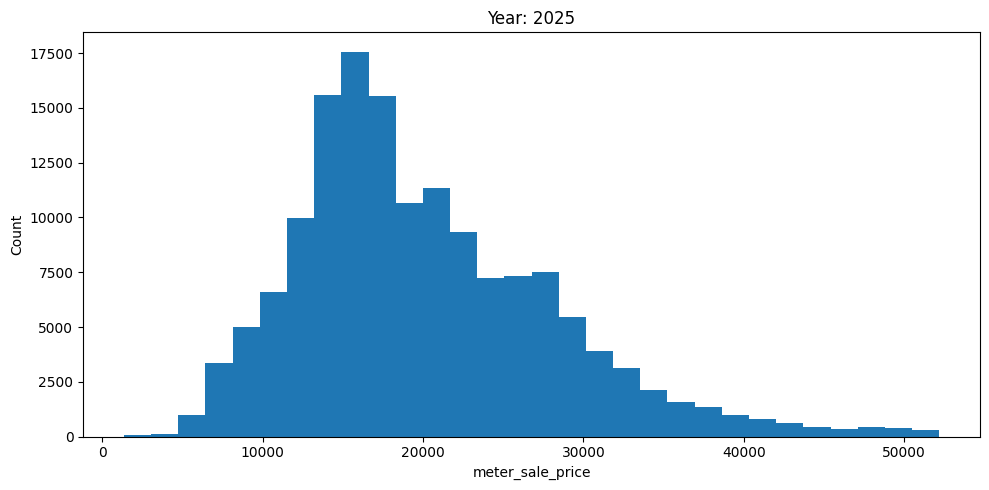

In [209]:
years = df_unit["instance_date"].dt.year.sort_values().unique()

for y in years:
    plt.figure(figsize=(10, 5))     # 🔥 creates a NEW figure each loop
    
    df_unit.loc[df_unit["instance_date"].dt.year == y, "meter_sale_price"] \
           .plot.hist(
               bins=30,
               title=f"Year: {y}"
           )
    
    plt.xlabel("meter_sale_price")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [188]:
gdf_polygons = gpd.read_file("data/dubai.geojson")

df_unit = df_unit.merge(
    gdf_polygons[["CNAME_E","Area Sq Km","geometry"]],
    how="left"
)

df_unit.shape

(826781, 16)

In [189]:
df_cnt = (
    df_unit.groupby(["area_name_en","Area Sq Km"])
    .agg({"area_name_en":"count"})
    .rename(columns={"area_name_en":"cnt_transactions"})
    .reset_index()
)

df_cnt["transactions_per_sq_km"] = (
    df_cnt["cnt_transactions"] / df_cnt["Area Sq Km"]
)

df_cnt.sort_values("transactions_per_sq_km", ascending=False).head(20)

,area_name_en,Area Sq Km,cnt_transactions,transactions_per_sq_km
29,BURJ KHALIFA,2.660072,51091,19206.624232
2,AL BARSHA SOUTH FOURTH,6.803107,74001,10877.530274
45,MARSA DUBAI,8.881065,93912,10574.406938
30,BUSINESS BAY,6.586259,54992,8349.505215
4,AL BARSHAA SOUTH THIRD,3.743674,20756,5544.286012
25,AL WARSAN FIRST,8.626109,42274,4900.703237
28,BUKADRA,1.745153,8456,4845.420468
24,AL THANYAH THIRD,3.842430,16623,4326.169060
22,AL THANYAH FIFTH,9.714096,40205,4138.830853
15,AL KIFAF,0.795646,3249,4083.476226


In [191]:
def random_point_in_polygon(poly, max_iter=1000):
    minx, miny, maxx, maxy = poly.bounds
    
    for _ in range(max_iter):   # prevent infinite loops
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        p = Point(x, y)
        if poly.contains(p):
            return p
    
    raise ValueError("No point found—polygon may be degenerate or too thin.")


In [192]:
df_unit["syn_points"] = df_unit["geometry"].apply(lambda p: random_point_in_polygon(p, max_iter=1000))

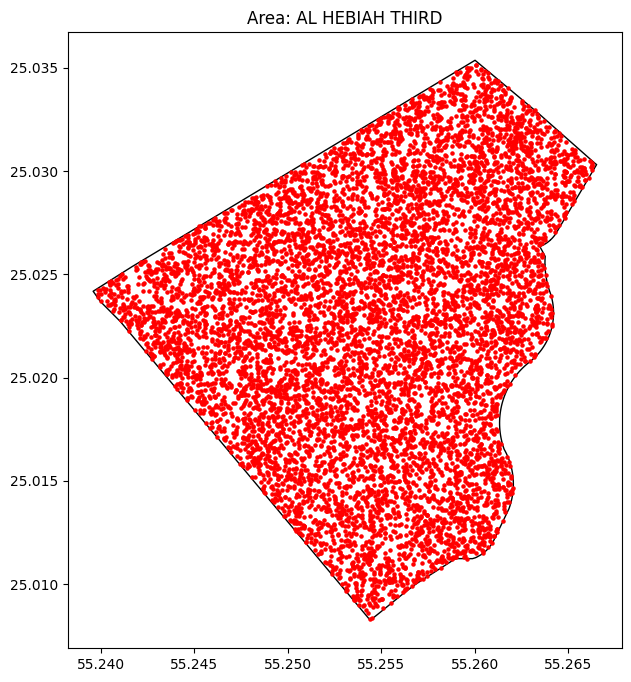

In [197]:
# 1. Pick a random area_name_en
random_area = df_unit["area_name_en"].sample(1).iloc[0]

# 2. Filter rows for that area
sub = df_unit[df_unit["area_name_en"] == random_area]

# 3. Get the unique polygon geometry as a GeoDataFrame
poly_gdf = gpd.GeoDataFrame(
    sub.iloc[[0]][["area_name_en"]].copy(),
    geometry=sub.iloc[[0]]["geometry"],
    crs="EPSG:4326" 
)

# 4. Build a GeoDataFrame with all syn_points for that area
points_gdf = gpd.GeoDataFrame(
    sub[["area_name_en"]].copy(),
    geometry=sub["syn_points"],
    crs="EPSG:4326" 
)

# 5. Plot polygon + all synthetic points
fig, ax = plt.subplots(figsize=(8, 8))

poly_gdf.plot(ax=ax, edgecolor="black", facecolor="none")
points_gdf.plot(ax=ax, markersize=5, color="red")

ax.set_title(f"Area: {random_area}")
plt.show()

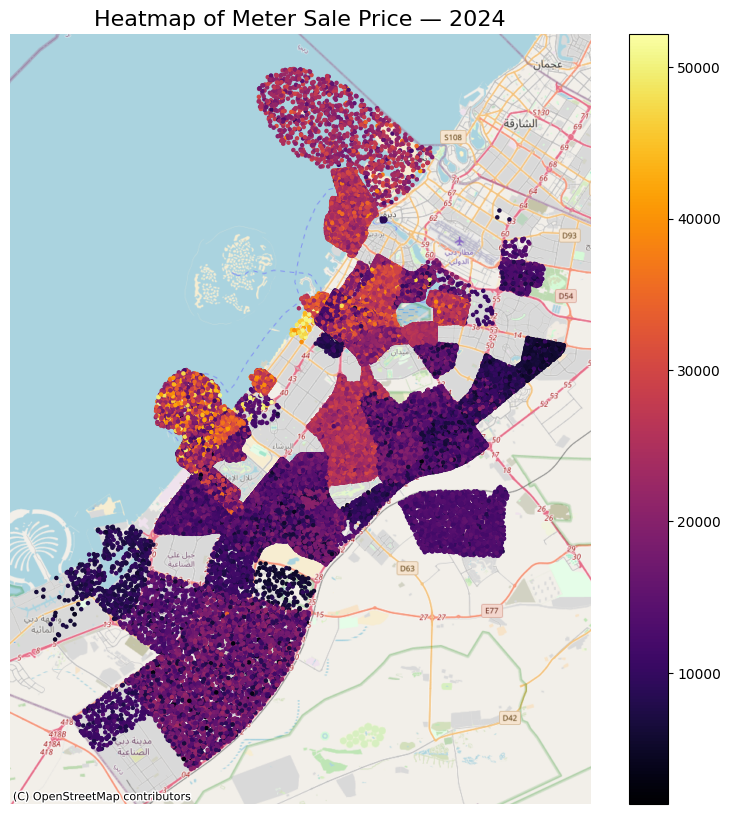

In [198]:
df_2024 = df_unit[df_unit["instance_date"].dt.year == 2024].copy()

# GeoDataFrame based on syn_points (points)
gdf_points = gpd.GeoDataFrame(
    df_2024,
    geometry=df_2024["syn_points"],
    crs="EPSG:4326"
)

import contextily as ctx

# Reproject to Web Mercator for basemap
gdf_points_3857 = gdf_points.to_crs(3857)

fig, ax = plt.subplots(figsize=(10, 10))

gdf_points_3857.plot(
    ax=ax,
    column="meter_sale_price",
    cmap="inferno",
    markersize=5,
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Heatmap of Meter Sale Price — 2024", fontsize=16)
ax.set_axis_off()

plt.show()

In [200]:
# Create GeoDataFrame using syn_points as geometry (points)
gdf = gpd.GeoDataFrame(
    df_unit,
    geometry=df_unit["syn_points"],
    crs="EPSG:4326"   # adjust if you know a different CRS
)

# Extract year
gdf["year"] = gdf["instance_date"].dt.year


import contextily as ctx

# Reproject to Web Mercator for basemap
gdf_3857 = gdf.to_crs(3857)

# Color scale (same across all years)
vmin = gdf_3857["meter_sale_price"].min()
vmax = gdf_3857["meter_sale_price"].max()

# Fixed extent (same map view for all frames)
minx, miny, maxx, maxy = gdf_3857.total_bounds

# Sorted list of years
years = sorted(gdf_3857["year"].dropna().unique())

import os
import matplotlib.pyplot as plt

frames_dir = "frames_yearly_heatmap"
os.makedirs(frames_dir, exist_ok=True)

for year in years:
    gdf_y = gdf_3857[gdf_3857["year"] == year]

    if gdf_y.empty:
        continue  # skip empty years just in case

    fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

    # Plot points colored by meter_sale_price (point "heatmap")
    gdf_y.plot(
        ax=ax,
        column="meter_sale_price",
        cmap="inferno",        # heatmap-style color map
        vmin=vmin,
        vmax=vmax,
        markersize=5,
        legend=True,
        alpha=0.8
    )

    # Basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    # Fix extent so all frames have same size & map view
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    ax.set_axis_off()
    ax.set_title(f"Meter Sale Price (syn_points) — {year}", fontsize=16)

    frame_path = os.path.join(frames_dir, f"frame_{year}.png")
    plt.savefig(frame_path)          # IMPORTANT: no bbox_inches="tight"
    plt.close(fig)



    import imageio.v2 as imageio

# Collect frames in order
frame_paths = [os.path.join(frames_dir, f"frame_{y}.png") for y in years]
frames = [imageio.imread(p) for p in frame_paths if os.path.exists(p)]

# GIF (1 frame per second = 1 year/s)
imageio.mimsave("meter_sale_price_syn_points_by_year.gif", frames, fps=1)

# MP4 (requires imageio-ffmpeg installed)
with imageio.get_writer("meter_sale_price_syn_points_by_year.mp4", fps=1) as writer:
    for frame in frames:
        writer.append_data(frame)


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1500) to (1504, 1504) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x13d804900] Stream #0: not enough frames to estimate rate; consider increasing probesize


has_parking
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: meter_sale_price, dtype: object

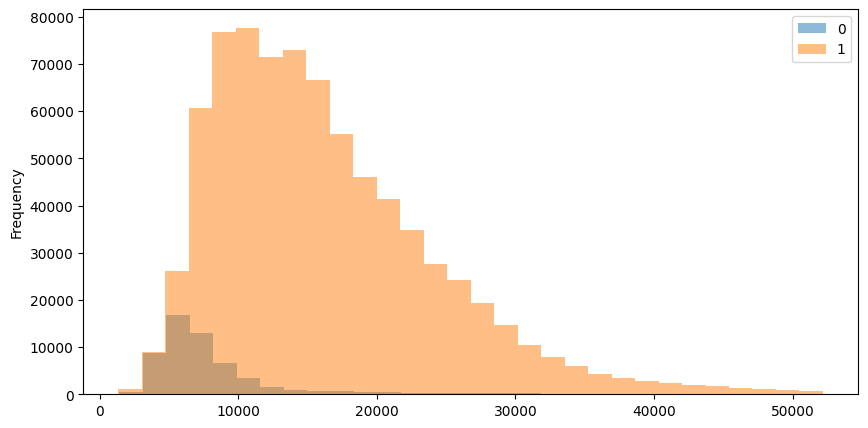

In [11]:

(
    df_unit
    .groupby("has_parking")["meter_sale_price"]
    .plot.
    hist(
        bins=30,
        alpha=0.5,
        legend=True,
        figsize=(10, 5)
    )
)

In [ ]:
df_unit_0 = df_unit[df_unit["has_parking"] == 0]
df_unit_1 = df_unit[df_unit["has_parking"] == 1]

shift = df_unit_0["meter_sale_price"].median() - df_unit_1["meter_sale_price"].median()

df0_aligned = df_unit_0["meter_sale_price"] - shift

from scipy.stats import ks_2samp

stat, p = ks_2samp(df_unit_1["meter_sale_price"], df0_aligned)
print(stat, p)


0.30775184135514694 0.0


In [15]:
df_unit["has_parking"].value_counts()

has_parking
1    771153
0     55628
Name: count, dtype: int64

In [20]:
from scipy.stats import wasserstein_distance

df_unit_0 = df_unit[df_unit["has_parking"] == 0]
df_unit_1 = df_unit[df_unit["has_parking"] == 1]

shift = df_unit_1["meter_sale_price"].median() - df_unit_0["meter_sale_price"].median()

wd_before = wasserstein_distance(df_unit_0["meter_sale_price"], df_unit_1["meter_sale_price"])
wd_after = wasserstein_distance(df_unit_0["meter_sale_price"], df_unit_1["meter_sale_price"]- shift)


print(wd_before, wd_after)

8102.388934543417 3175.313436548128


In [52]:
from scipy.stats import wasserstein_distance

df_unit_0 = df_unit[df_unit["has_parking"] == 0]
df_unit_1 = df_unit[df_unit["has_parking"] == 1]

shift = df_unit_1["meter_sale_price"].median() - df_unit_0["meter_sale_price"].median()


df0_shifted = df_unit_0["meter_sale_price"] + shift

df1_sample = df_unit_1["meter_sale_price"].sample(len(df_unit_0))

from scipy.stats import ks_2samp
stat, p = ks_2samp(df1_sample, df0_shifted)
print(stat, p)

wd_after = wasserstein_distance(df1_sample, df0_shifted)


print(wd_before, wd_after)

0.30684187819083913 0.0
8102.388934543417 3186.913769145035
